In [ ]:
! pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/datasets/kartik2112/fraud-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ankitabaishnab
Your Kaggle Key: ··········


100%|██████████| 202M/202M [00:02<00:00, 74.2MB/s]


In [ ]:
dataset = pd.read_csv("/content/fraud-detection/fraudTrain.csv")

In [ ]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])

In [ ]:
dataset['hour'] = dataset['trans_date_trans_time'].dt.hour
dataset['day_of_week'] = dataset['trans_date_trans_time'].dt.dayofweek
dataset['month'] = dataset['trans_date_trans_time'].dt.month

In [ ]:
dataset = dataset.drop(['Unnamed: 0', 'trans_date_trans_time','merchant', 'first', 'last', 'street',
                        'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)

In [ ]:
dataset['gender'].replace({'M': 0, 'F': 1}, inplace=True)

In [ ]:
dataset['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

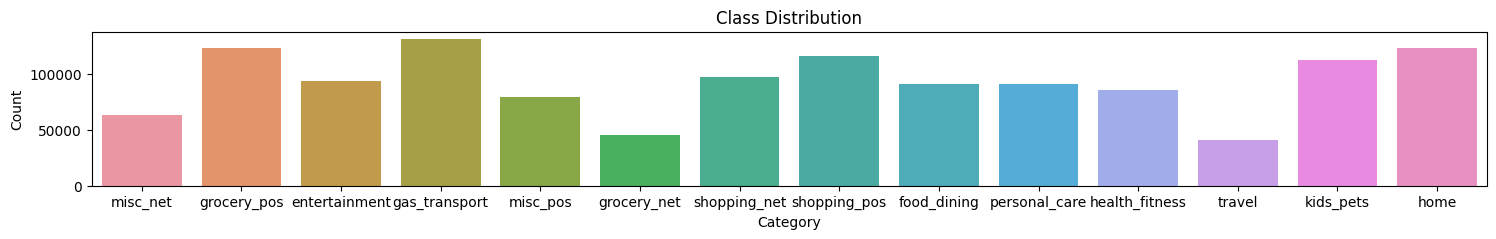

In [ ]:
plt.figure(figsize=(18, 2))
sns.countplot(x='category', data=dataset)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
dataset = pd.get_dummies(dataset, columns=['category'], drop_first=True)

In [ ]:
dataset.head()

,cc_num,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,1,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,...,0,0,0,0,1,0,0,0,0,0
1,630423337322,107.23,1,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,...,1,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,0,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   amt                      1296675 non-null  float64
 2   gender                   1296675 non-null  int64  
 3   lat                      1296675 non-null  float64
 4   long                     1296675 non-null  float64
 5   city_pop                 1296675 non-null  int64  
 6   unix_time                1296675 non-null  int64  
 7   merch_lat                1296675 non-null  float64
 8   merch_long               1296675 non-null  float64
 9   is_fraud                 1296675 non-null  int64  
 10  hour                     1296675 non-null  int64  
 11  day_of_week              1296675 non-null  int64  
 12  month                    1296675 non-null  int64  
 13  category_food_dining     1296675 non-null 

In [ ]:
dataset['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

0 - Legitimate Transaction;
1 - Fraudulent Transaction

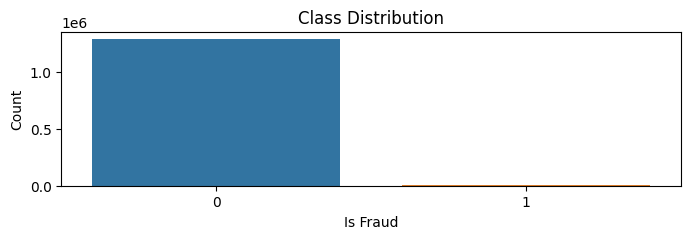

In [ ]:
plt.figure(figsize=(8, 2))
sns.countplot(x='is_fraud', data=dataset)
plt.title('Class Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [ ]:
dataset['hour'].value_counts()

23    67104
22    66982
18    66051
16    65726
21    65533
19    65508
17    65450
15    65391
13    65314
12    65257
20    65098
14    64885
1     42869
3     42769
2     42656
8     42505
0     42502
6     42300
10    42271
7     42203
9     42185
5     42171
11    42082
4     41863
Name: hour, dtype: int64

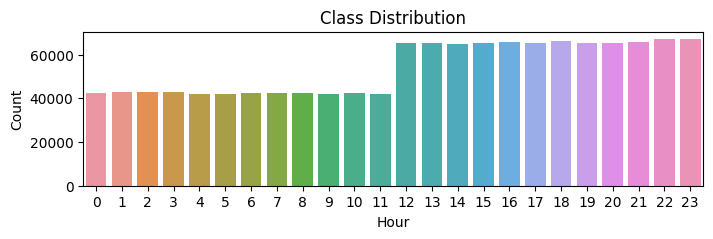

In [ ]:
plt.figure(figsize=(8, 2))
sns.countplot(x='hour', data=dataset)
plt.title('Class Distribution')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [ ]:
dataset['day_of_week'].value_counts()

0    254282
6    250579
5    200957
1    160227
4    152272
3    147285
2    131073
Name: day_of_week, dtype: int64

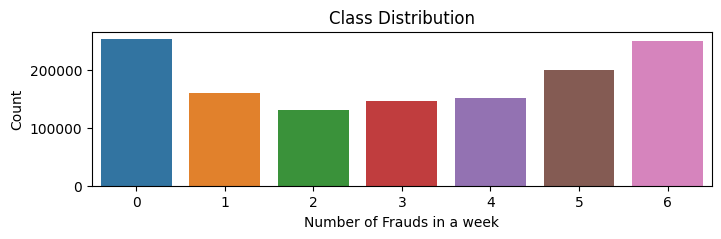

In [ ]:
plt.figure(figsize=(8, 2))
sns.countplot(x='day_of_week', data=dataset)
plt.title('Class Distribution')
plt.xlabel('Number of Frauds in a week')
plt.ylabel('Count')
plt.show()

In [ ]:
dataset['month'].value_counts()

5     146875
6     143811
3     143789
12    141060
4     134970
1     104727
2      97657
8      87359
7      86596
9      70652
11     70421
10     68758
Name: month, dtype: int64

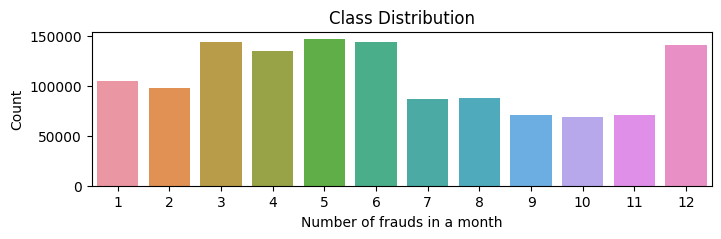

In [ ]:
plt.figure(figsize=(8, 2))
sns.countplot(x='month', data=dataset)
plt.title('Class Distribution')
plt.xlabel('Number of frauds in a month')
plt.ylabel('Count')
plt.show()

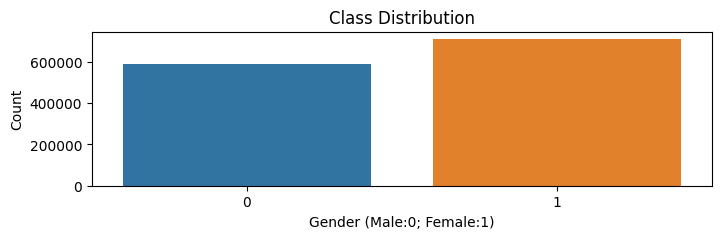

In [ ]:
plt.figure(figsize=(8, 2))
sns.countplot(x='gender', data=dataset)
plt.title('Class Distribution')
plt.xlabel('Gender (Male:0; Female:1)')
plt.ylabel('Count')
plt.show()

<Axes: >

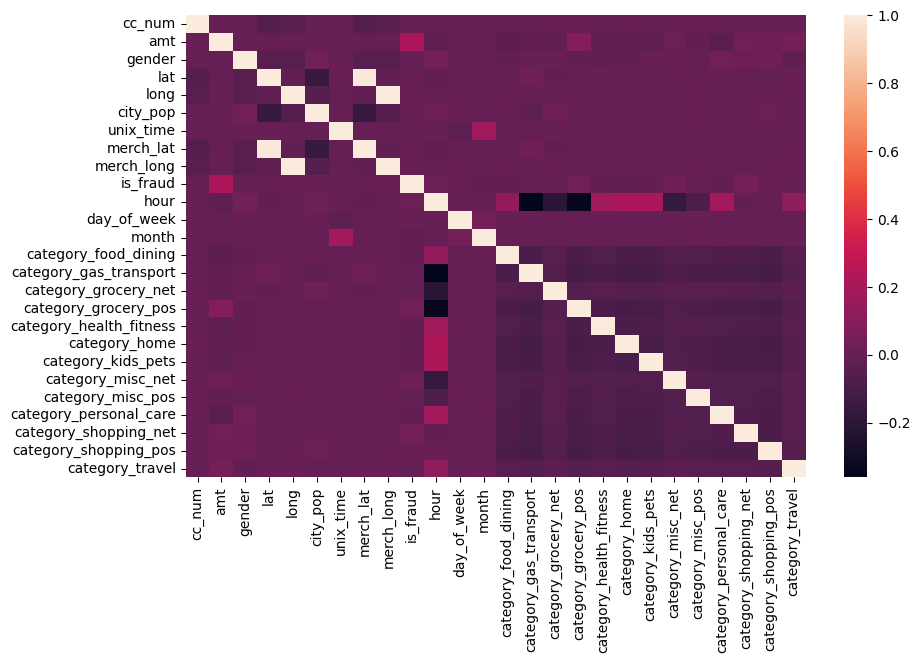

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr())

In [ ]:
new_df=dataset.drop(['is_fraud'], axis=1)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   amt                      1296675 non-null  float64
 2   gender                   1296675 non-null  int64  
 3   lat                      1296675 non-null  float64
 4   long                     1296675 non-null  float64
 5   city_pop                 1296675 non-null  int64  
 6   unix_time                1296675 non-null  int64  
 7   merch_lat                1296675 non-null  float64
 8   merch_long               1296675 non-null  float64
 9   hour                     1296675 non-null  int64  
 10  day_of_week              1296675 non-null  int64  
 11  month                    1296675 non-null  int64  
 12  category_food_dining     1296675 non-null  uint8  
 13  category_gas_transport   1296675 non-null 

In [ ]:
x = new_df
y = dataset['is_fraud']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [ ]:
rf_classifier.fit(x, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
feature_importances = rf_classifier.feature_importances_
sorted_idx = feature_importances.argsort()

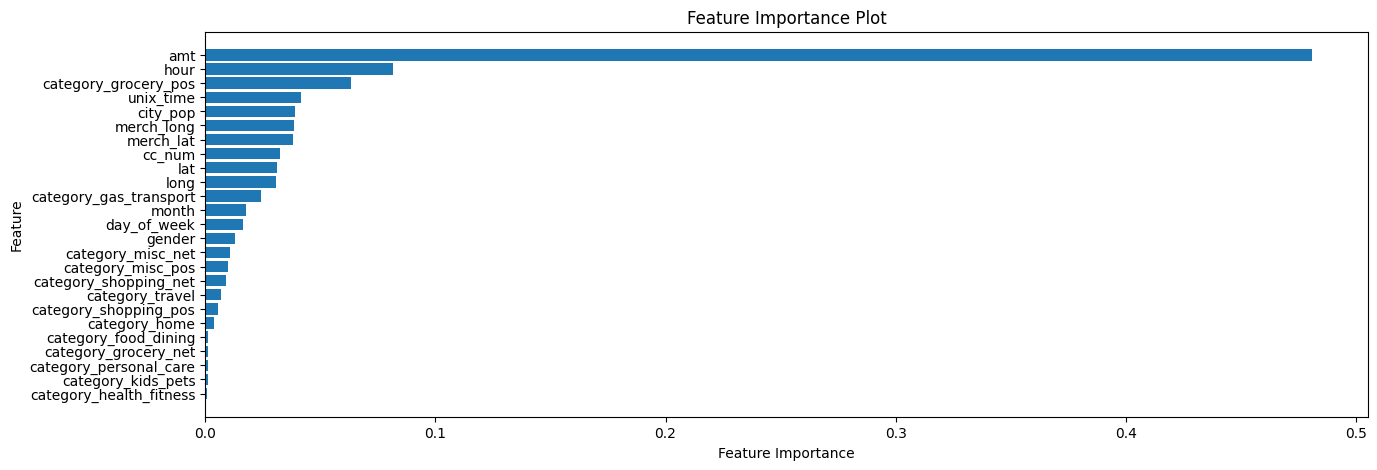

In [ ]:
plt.figure(figsize=(15, 5))
plt.barh(range(new_df.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(new_df.shape[1]), new_df.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:
test_df=pd.read_csv('/content/fraud-detection/fraudTest.csv')

In [ ]:
test_df.shape

(555719, 23)

In [ ]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['day_of_week'] = test_df['trans_date_trans_time'].dt.dayofweek
test_df['month'] = test_df['trans_date_trans_time'].dt.month

In [ ]:
test_df = test_df.drop(['Unnamed: 0', 'trans_date_trans_time','merchant', 'first', 'last', 'street',
                        'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)

In [ ]:
test_df['gender'].replace({'M': 0, 'F': 1}, inplace=True)

In [ ]:
test_df = pd.get_dummies(test_df, columns=['category'], drop_first=True)

In [ ]:
test_df.head()

,cc_num,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2291163933867244,2.86,0,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,...,0,0,0,0,0,0,1,0,0,0
1,3573030041201292,29.84,1,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,...,0,0,0,0,0,0,1,0,0,0
2,3598215285024754,41.28,1,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,...,0,1,0,0,0,0,0,0,0,0
3,3591919803438423,60.05,0,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,...,0,0,0,0,0,1,0,0,0,0
4,3526826139003047,3.19,0,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_test=test_df.drop(['is_fraud'], axis=1)
y_test=test_df['is_fraud']

Random Forest Classifier

In [ ]:
predict=rf_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.90      0.65      0.75      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.82      0.88    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict))

ROC-AUC Score: 0.8241024248927438


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)

In [ ]:
lr_model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
predict_1=lr_model.predict(x_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict_1))

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict_1))

ROC-AUC Score: 0.5


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=10)

In [ ]:
dt_classifier.fit(x, y)

DecisionTreeClassifier(max_depth=10)

In [ ]:
predict_2 = dt_classifier.predict(x_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict_2))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.67      0.71      0.69      2145

    accuracy                           1.00    555719
   macro avg       0.84      0.85      0.85    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict_2))

ROC-AUC Score: 0.8541164933378079
